# Importando archivos y librerias

In [118]:
# Importar el entorno de dirve
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install pyhdf
!pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.4/771.4 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.6/860.6 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 62.5 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.6.0
    Uninstalling pyproj-3.6.0:
      Successfully uninstalled pyproj-3.6.0


In [4]:
# Importar librerias
from pyhdf import SD # Para importar y leer archivos hdf
from mpl_toolkits.basemap import Basemap, cm # Graficos de mapas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob as glb

In [161]:
%cd /content/drive/MyDrive/MODIS/Instrumental

/content/drive/MyDrive/MODIS/Instrumental


In [162]:
files = sorted(glb.glob("*hdf"))
files

['MOD07_L2.A2023174.1235.061.2023175012001.hdf',
 'MOD07_L2.A2023175.1315.061.2023176012248.hdf',
 'MOD07_L2.A2023177.1305.061.2023178022855.hdf',
 'MOD07_L2.A2023179.1245.061.2023180012013.hdf']

In [163]:
hdf_23_junio = SD.SD(files[0])
hdf_24_junio = SD.SD(files[1])
hdf_26_junio = SD.SD(files[2])
hdf_28_junio = SD.SD(files[3])

# 23 de junio 12:35

In [50]:
latitud23= hdf_23_junio.select('Latitude')[:]
latitud23

array([[  5.8034053,   5.7763906,   5.750289 , ...,   2.959344 ,
          2.930564 ,   2.9007103],
       [  5.714916 ,   5.68923  ,   5.664402 , ...,   2.875057 ,
          2.8450675,   2.8139539],
       [  5.714928 ,   5.6878667,   5.661721 , ...,   2.8711286,
          2.8424015,   2.8126035],
       ...,
       [-11.926713 , -11.964675 , -12.001152 , ..., -14.88549  ,
        -14.906103 , -14.92729  ],
       [-11.925639 , -11.964984 , -12.002785 , ..., -14.888481 ,
        -14.907811 , -14.92766  ],
       [-12.013706 , -12.051746 , -12.088302 , ..., -14.97386  ,
        -14.99443  , -15.015572 ]], dtype=float32)

In [51]:
longitud23 = hdf_23_junio.select('Longitude')[:]
longitud23

array([[-47.0149  , -46.80915 , -46.61091 , ..., -27.227184, -27.037308,
        -26.84053 ],
       [-47.02563 , -46.819763, -46.621403, ..., -27.240013, -27.050335,
        -26.853764],
       [-47.031357, -46.825687, -46.62752 , ..., -27.245565, -27.055687,
        -26.858902],
       ...,
       [-51.06602 , -50.85742 , -50.656162, ..., -30.672398, -30.473206,
        -30.26666 ],
       [-51.07361 , -50.865227, -50.664196, ..., -30.680016, -30.480705,
        -30.274042],
       [-51.0903  , -50.8816  , -50.68022 , ..., -30.688667, -30.489393,
        -30.282766]], dtype=float32)

In [59]:
# Definiendo coordenadas
lat_obs = -18.87
long_obs = -48.22

In [10]:
hdf_23_junio.info()

(30, 10)

In [49]:
datasets = hdf_23_junio.datasets()
datasets.keys()

dict_keys(['Latitude', 'Longitude', 'Scan_Start_Time', 'Solar_Zenith', 'Solar_Azimuth', 'Sensor_Zenith', 'Sensor_Azimuth', 'Brightness_Temperature', 'Cloud_Mask', 'Skin_Temperature', 'Surface_Pressure', 'Surface_Elevation', 'Processing_Flag', 'Tropopause_Height', 'Guess_Temperature_Profile', 'Guess_Moisture_Profile', 'Retrieved_Temperature_Profile', 'Retrieved_Moisture_Profile', 'Retrieved_WV_Mixing_Ratio_Profile', 'Retrieved_Height_Profile', 'Total_Ozone', 'Total_Totals', 'Lifted_Index', 'K_Index', 'Water_Vapor', 'Water_Vapor_Direct', 'Water_Vapor_Low', 'Water_Vapor_High', 'Quality_Assurance', 'Quality_Assurance_Infrared'])

## Temperatura

In [52]:
variable_temp = 'Retrieved_Temperature_Profile'
sds_temp_23_junio = hdf_23_junio.select(variable_temp)

In [55]:
attrs_temp23 = sds_temp_23_junio.attributes()
attrs_temp23

{'valid_range': [0, 20000],
 '_FillValue': -32768,
 'long_name': 'Retrieved Temperature Profile',
 'units': 'K',
 'scale_factor': 0.009999999776482582,
 'add_offset': -15000.0,
 'Parameter_Type': 'MODIS Ouput',
 'Cell_Along_Swath_Sampling': [3, 2028, 5],
 'Cell_Across_Swath_Sampling': [3, 1348, 5],
 'Geolocation_Pointer': 'Internal geolocation arrays'}

In [56]:
scale_factor =  attrs_temp23['scale_factor']
add_offset = attrs_temp23['add_offset']
FillValue = attrs_temp23['_FillValue']

In [53]:
data_temp_23 = sds_temp_23_junio.get()
data_temp_23

array([[[-32768, -32768,   8743, ...,   8961,   8881,   8994],
        [-32768, -32768, -32768, ...,   8922, -32768, -32768],
        [-32768, -32768,   8693, ...,   8867,   8968,   9097],
        ...,
        [-32768, -32768,   9353, ..., -32768, -32768,   9011],
        [-32768, -32768,   9302, ...,   8823, -32768,   8993],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768]],

       [[-32768, -32768,   7997, ...,   8165,   8079,   8199],
        [-32768, -32768, -32768, ...,   8118, -32768, -32768],
        [-32768, -32768,   7953, ...,   8088,   8152,   8248],
        ...,
        [-32768, -32768,   8189, ..., -32768, -32768,   8219],
        [-32768, -32768,   8127, ...,   8042, -32768,   8159],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768]],

       [[-32768, -32768,   7268, ...,   7415,   7352,   7449],
        [-32768, -32768, -32768, ...,   7366, -32768, -32768],
        [-32768, -32768,   7233, ...,   7352,   7401,   7449],
        ...,
        [-32

In [57]:
data_temp_23 = data_temp_23.astype(float)
data_temp_23[data_temp_23 == FillValue] = np.NaN
data_temp_23

array([[[   nan,    nan,  8743., ...,  8961.,  8881.,  8994.],
        [   nan,    nan,    nan, ...,  8922.,    nan,    nan],
        [   nan,    nan,  8693., ...,  8867.,  8968.,  9097.],
        ...,
        [   nan,    nan,  9353., ...,    nan,    nan,  9011.],
        [   nan,    nan,  9302., ...,  8823.,    nan,  8993.],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[   nan,    nan,  7997., ...,  8165.,  8079.,  8199.],
        [   nan,    nan,    nan, ...,  8118.,    nan,    nan],
        [   nan,    nan,  7953., ...,  8088.,  8152.,  8248.],
        ...,
        [   nan,    nan,  8189., ...,    nan,    nan,  8219.],
        [   nan,    nan,  8127., ...,  8042.,    nan,  8159.],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[   nan,    nan,  7268., ...,  7415.,  7352.,  7449.],
        [   nan,    nan,    nan, ...,  7366.,    nan,    nan],
        [   nan,    nan,  7233., ...,  7352.,  7401.,  7449.],
        ...,
        [   

In [58]:
temp_celsius_23 = (scale_factor*(data_temp_23-add_offset)) -273.15
temp_celsius_23

array([[[         nan,          nan, -35.72000531, ..., -33.54000536,
         -34.34000534, -33.21000536],
        [         nan,          nan,          nan, ..., -33.93000535,
                  nan,          nan],
        [         nan,          nan, -36.2200053 , ..., -34.48000533,
         -33.47000536, -32.18000539],
        ...,
        [         nan,          nan, -29.62000544, ...,          nan,
                  nan, -33.04000537],
        [         nan,          nan, -30.13000543, ..., -34.92000532,
                  nan, -33.22000536],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan, -43.18000514, ..., -41.50000518,
         -42.36000516, -41.16000519],
        [         nan,          nan,          nan, ..., -41.97000517,
                  nan,          nan],
        [         nan,          nan, -43.62000513, ..., -42.27000516,
         -41.63000517, -40.6700052 ],
        ...,


In [60]:
coordenadas = np.unravel_index((np.abs(latitud23 - lat_obs) + np.abs(longitud23 - long_obs)).argmin(),longitud23.shape)
coordenadas

(405, 18)

In [85]:
temp23 = temp_celsius_23[:, coordenadas[0],coordenadas[1]]
temp23

array([-29.15000545, -41.03000519, -49.78000499, -55.22000487,
       -63.49000469, -70.44000453, -73.99000445, -66.10000463,
       -55.60000486, -44.32000511, -34.19000534, -18.43000569,
        -6.48000596,   3.60999381,   8.20999371,  11.28999364,
        12.86999361,  15.65999354,  17.31999351,          nan])

## Temperatura de rocio

In [67]:
variable_temp_rocio = 'Retrieved_Moisture_Profile'
sds_rocio_23_junio = hdf_23_junio.select(variable_temp_rocio)

In [63]:
data_rocio_23 = sds_rocio_23_junio.get()
data_rocio_23

array([[[-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        ...,
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768]],

       [[-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        ...,
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768]],

       [[-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        ...,
        [-32

In [64]:
data_rocio_23 = data_rocio_23.astype(float)
data_rocio_23[data_rocio_23 == FillValue] = np.NaN
data_rocio_23

array([[[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [   

In [65]:
rocio_celsius_23 = (scale_factor*(data_rocio_23-add_offset)) -273.15
rocio_celsius_23

array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,  

In [84]:
rocio23 = rocio_celsius_23[:, coordenadas[0],coordenadas[1]]
rocio23

array([         nan,          nan,          nan,          nan,
       -90.25000409, -87.26000415, -84.07000423, -78.39000435,
       -71.11000452, -63.55000468, -56.27000485, -43.14000514,
       -34.05000534, -23.53000558, -14.50000578,  -3.05000604,
         6.39999375,  10.88999365,  12.43999362,          nan])

## Elevacion

In [77]:
variable_elev = "Retrieved_Height_Profile"
sds_elev_23_junio = hdf_23_junio.select(variable_elev)

In [78]:
attrs_elev23 = sds_elev_23_junio.attributes()
attrs_elev23

{'valid_range': [-32500, 32500],
 '_FillValue': -32768,
 'long_name': 'Retrieved Geopotential Height Profile',
 'units': 'm',
 'scale_factor': 1.0,
 'add_offset': -32500.0,
 'Parameter_Type': 'MODIS Output',
 'Cell_Along_Swath_Sampling': [3, 2028, 5],
 'Cell_Across_Swath_Sampling': [3, 1348, 5],
 'Geolocation_Pointer': 'Internal geolocation arrays'}

In [79]:
data_elev_23 = sds_elev_23_junio.get()
data_elev_23 = data_elev_23.astype(float)
data_elev_23[data_elev_23 == -32768] = np.NaN
data_elev_23

array([[[    nan,     nan,   3175., ...,   3329.,   3259.,   3370.],
        [    nan,     nan,     nan, ...,   3286.,     nan,     nan],
        [    nan,     nan,   3148., ...,   3277.,   3294.,   3371.],
        ...,
        [    nan,     nan,   3019., ...,     nan,     nan,   3354.],
        [    nan,     nan,   2969., ...,   3194.,     nan,   3276.],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan]],

       [[    nan,     nan,  -1568., ...,  -1453.,  -1504.,  -1419.],
        [    nan,     nan,     nan, ...,  -1486.,     nan,     nan],
        [    nan,     nan,  -1586., ...,  -1488.,  -1486.,  -1434.],
        ...,
        [    nan,     nan,  -1801., ...,     nan,     nan,  -1441.],
        [    nan,     nan,  -1838., ...,  -1561.,     nan,  -1510.],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan]],

       [[    nan,     nan,  -6166., ...,  -6082.,  -6118.,  -6054.],
        [    nan,     nan,     nan, ...,  -6106.,     nan,     nan],
    

In [81]:
perfil_23 =  1*(data_elev_23-(-32500.0))
perfil_23

array([[[   nan,    nan, 35675., ..., 35829., 35759., 35870.],
        [   nan,    nan,    nan, ..., 35786.,    nan,    nan],
        [   nan,    nan, 35648., ..., 35777., 35794., 35871.],
        ...,
        [   nan,    nan, 35519., ...,    nan,    nan, 35854.],
        [   nan,    nan, 35469., ..., 35694.,    nan, 35776.],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[   nan,    nan, 30932., ..., 31047., 30996., 31081.],
        [   nan,    nan,    nan, ..., 31014.,    nan,    nan],
        [   nan,    nan, 30914., ..., 31012., 31014., 31066.],
        ...,
        [   nan,    nan, 30699., ...,    nan,    nan, 31059.],
        [   nan,    nan, 30662., ..., 30939.,    nan, 30990.],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[   nan,    nan, 26334., ..., 26418., 26382., 26446.],
        [   nan,    nan,    nan, ..., 26394.,    nan,    nan],
        [   nan,    nan, 26325., ..., 26397., 26387., 26426.],
        ...,
        [   

In [80]:
data_elev_23.shape

(20, 406, 270)

In [83]:
altura23 = perfil_23[:,coordenadas[0],coordenadas[1]]
altura23

array([35633., 30805., 26183., 23562., 20363., 18330., 16237., 13834.,
       12045., 10587.,  9338.,  7257.,  5552.,  3839.,  2846.,  1948.,
        1227.,   558.,   284.,    nan])

## Df

In [91]:
df_23_junio = pd.DataFrame({'Altura (m)': altura23, 'T (ºC)': temp23, 'Td (ºC)': rocio23})
df_23_junio

,Altura (m),T (ºC),Td (ºC)
0,35633.0,-29.150005,NaN
1,30805.0,-41.030005,NaN
2,26183.0,-49.780005,NaN
3,23562.0,-55.220005,NaN
4,20363.0,-63.490005,-90.250004
5,18330.0,-70.440005,-87.260004
6,16237.0,-73.990004,-84.070004
7,13834.0,-66.100005,-78.390004
8,12045.0,-55.600005,-71.110005
9,10587.0,-44.320005,-63.550005


# Dia 24 de junio 12:15

In [121]:
longitud24 = hdf_24_junio.select('Longitude')[:]
longitud24

array([[-56.552277, -56.344456, -56.144245, ..., -36.62878 , -36.438427,
        -36.241177],
       [-56.56202 , -56.354122, -56.15383 , ..., -36.64279 , -36.452675,
        -36.255665],
       [-56.567673, -56.35995 , -56.15984 , ..., -36.648518, -36.45816 ,
        -36.2609  ],
       ...,
       [-60.362976, -60.15647 , -59.957325, ..., -40.283226, -40.08677 ,
        -39.88307 ],
       [-60.37048 , -60.16426 , -59.965355, ..., -40.29073 , -40.09415 ,
        -39.890213],
       [-60.385582, -60.178814, -59.98017 , ..., -40.301186, -40.103615,
        -39.899975]], dtype=float32)

In [122]:
latitud24= hdf_24_junio.select('Latitude')[:]
latitud24

array([[  9.6682205,   9.643494 ,   9.619551 , ...,   6.8129086,
          6.781784 ,   6.749457 ],
       [  9.579662 ,   9.556268 ,   9.533602 , ...,   6.7288647,
          6.6965384,   6.6629596],
       [  9.5797415,   9.554967 ,   9.530981 , ...,   6.72466  ,
          6.693585 ,   6.6613092],
       ...,
       [ -8.102376 ,  -8.137365 ,  -8.17101  , ..., -11.009601 ,
        -11.0322485, -11.055593 ],
       [ -8.101514 ,  -8.137873 ,  -8.172837 , ..., -11.012615 ,
        -11.033969 , -11.055976 ],
       [ -8.189709 ,  -8.224803 ,  -8.25842  , ..., -11.097573 ,
        -11.120294 , -11.143572 ]], dtype=float32)

In [123]:
coordenadas24 = np.unravel_index((np.abs(latitud24 - lat_obs) + np.abs(longitud24 - long_obs)).argmin(),longitud24.shape)
coordenadas24

(405, 175)

## Temperatura

In [124]:
sds_temp_24_junio = hdf_24_junio.select(variable_temp)
attrs_temp24 = sds_temp_24_junio.attributes()
attrs_temp24

{'valid_range': [0, 20000],
 '_FillValue': -32768,
 'long_name': 'Retrieved Temperature Profile',
 'units': 'K',
 'scale_factor': 0.009999999776482582,
 'add_offset': -15000.0,
 'Parameter_Type': 'MODIS Ouput',
 'Cell_Along_Swath_Sampling': [3, 2028, 5],
 'Cell_Across_Swath_Sampling': [3, 1348, 5],
 'Geolocation_Pointer': 'Internal geolocation arrays'}

In [125]:
data_temp_24 = sds_temp_24_junio.get()
data_temp_24 = data_temp_24.astype(float)
data_temp_24[data_temp_24 == FillValue] = np.NaN
temp_celsius_24 = (scale_factor*(data_temp_24-add_offset)) -273.15
temp_celsius_24

array([[[         nan,          nan, -35.36000532, ...,          nan,
                  nan,          nan],
        [         nan,          nan, -34.64000533, ...,          nan,
                  nan,          nan],
        [         nan,          nan, -34.92000532, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan, -29.20000545, ...,          nan,
                  nan,          nan],
        [         nan,          nan, -28.07000548, ...,          nan,
                  nan,          nan],
        [         nan,          nan, -30.58000542, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan, -42.93000515, ...,          nan,
                  nan,          nan],
        [         nan,          nan, -42.44000516, ...,          nan,
                  nan,          nan],
        [         nan,          nan, -42.46000516, ...,          nan,
                  nan,          nan],
        ...,


In [126]:
temp24 = temp_celsius_24[:, coordenadas24[0],coordenadas24[1]]
temp24

array([-33.77000535, -43.79000513, -51.85000495, -56.78000484,
       -64.38000467, -70.35000453, -72.97000447, -65.60000464,
       -57.42000482, -47.47000504, -37.67000526, -21.25000563,
        -8.69000591,   1.36999386,   6.21999376,   9.75999368,
        12.73999361,  16.05999354,  17.6699935 ,          nan])

## Temperatura de rocio

In [127]:
sds_rocio_24_junio = hdf_24_junio.select(variable_temp_rocio)
data_rocio_24 = sds_rocio_24_junio.get()
data_rocio_24 = data_rocio_24.astype(float)
data_rocio_24[data_rocio_24 == FillValue] = np.NaN
rocio_celsius_24 = (scale_factor*(data_rocio_24-add_offset)) -273.15
rocio_celsius_24

array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,  

In [128]:
rocio24 = rocio_celsius_24[:, coordenadas24[0],coordenadas24[1]]
rocio24

array([         nan,          nan,          nan,          nan,
       -90.31000409, -87.58000415, -84.74000421, -78.57000435,
       -69.86000454, -61.87000472, -54.85000488, -43.82000513,
       -33.85000535, -18.50000569,  -8.12000592,   2.71999383,
         9.31999369,  12.76999361,  13.87999358,          nan])

## Elevacion

In [138]:
sds_elev_24_junio = hdf_24_junio.select(variable_elev)
attrs_elev24 = sds_elev_24_junio.attributes()
attrs_elev24

{'valid_range': [-32500, 32500],
 '_FillValue': -32768,
 'long_name': 'Retrieved Geopotential Height Profile',
 'units': 'm',
 'scale_factor': 1.0,
 'add_offset': -32500.0,
 'Parameter_Type': 'MODIS Output',
 'Cell_Along_Swath_Sampling': [3, 2028, 5],
 'Cell_Across_Swath_Sampling': [3, 1348, 5],
 'Geolocation_Pointer': 'Internal geolocation arrays'}

In [139]:
data_elev_24 = sds_elev_24_junio.get()
data_elev_24 = data_elev_24.astype(float)
data_elev_24[data_elev_24 == -32768] = np.NaN
perfil_24 =  1*(data_elev_24-(-32500.0))
perfil_24

array([[[   nan,    nan, 35733., ...,    nan,    nan,    nan],
        [   nan,    nan, 35748., ...,    nan,    nan,    nan],
        [   nan,    nan, 35782., ...,    nan,    nan,    nan],
        ...,
        [   nan,    nan, 35478., ...,    nan,    nan,    nan],
        [   nan,    nan, 35541., ...,    nan,    nan,    nan],
        [   nan,    nan, 35421., ...,    nan,    nan,    nan]],

       [[   nan,    nan, 30984., ...,    nan,    nan,    nan],
        [   nan,    nan, 30986., ...,    nan,    nan,    nan],
        [   nan,    nan, 31022., ...,    nan,    nan,    nan],
        ...,
        [   nan,    nan, 30655., ...,    nan,    nan,    nan],
        [   nan,    nan, 30698., ...,    nan,    nan,    nan],
        [   nan,    nan, 30623., ...,    nan,    nan,    nan]],

       [[   nan,    nan, 26382., ...,    nan,    nan,    nan],
        [   nan,    nan, 26376., ...,    nan,    nan,    nan],
        [   nan,    nan, 26411., ...,    nan,    nan,    nan],
        ...,
        [   

In [140]:
altura24 = perfil_24[:,coordenadas24[0],coordenadas24[1]]
altura24

array([35705., 30954., 26381., 23782., 20601., 18573., 16473., 14059.,
       12276., 10833.,  9602.,  7549.,  5860.,  4161.,  3175.,  2281.,
        1562.,   892.,   617.,    nan])

## Df

In [141]:
df_24_junio = pd.DataFrame({'Altura (m)': altura24, 'T (ºC)': temp24, 'Td (ºC)': rocio24})
df_24_junio

,Altura (m),T (ºC),Td (ºC)
0,35705.0,-33.770005,NaN
1,30954.0,-43.790005,NaN
2,26381.0,-51.850005,NaN
3,23782.0,-56.780005,NaN
4,20601.0,-64.380005,-90.310004
5,18573.0,-70.350005,-87.580004
6,16473.0,-72.970004,-84.740004
7,14059.0,-65.600005,-78.570004
8,12276.0,-57.420005,-69.860005
9,10833.0,-47.470005,-61.870005


# Para el 26 de junio 13:05

In [164]:
longitud26 = hdf_26_junio.select('Longitude')[:]
longitud26

array([[-57.751396, -57.540703, -57.337727, ..., -37.163296, -36.96155 ,
        -36.752354],
       [-57.768272, -57.557316, -57.354744, ..., -37.17156 , -36.96983 ,
        -36.76066 ],
       [-57.775887, -57.565025, -57.36256 , ..., -37.178837, -36.97701 ,
        -36.76774 ],
       ...,
       [-63.641407, -63.405094, -63.177063, ..., -39.761818, -39.522648,
        -39.27455 ],
       [-63.6463  , -63.41052 , -63.182915, ..., -39.767002, -39.52773 ,
        -39.279533],
       [-63.675373, -63.439075, -63.211063, ..., -39.771866, -39.53239 ,
        -39.283974]], dtype=float32)

In [165]:
latitud26= hdf_26_junio.select('Latitude')[:]
latitud26

array([[-13.882531 , -13.923651 , -13.9630785, ..., -16.875835 ,
        -16.894203 , -16.913029 ],
       [-13.9706135, -14.010409 , -14.048447 , ..., -16.96135  ,
        -16.98096  , -17.001081 ],
       [-13.969388 , -14.010601 , -14.049987 , ..., -16.964306 ,
        -16.98263  , -17.00141  ],
       ...,
       [-31.256443 , -31.31452  , -31.370092 , ..., -34.750565 ,
        -34.76171  , -34.772774 ],
       [-31.254734 , -31.31415  , -31.371023 , ..., -34.75247  ,
        -34.762302 , -34.772    ],
       [-31.341639 , -31.399776 , -31.455404 , ..., -34.83904  ,
        -34.85014  , -34.861156 ]], dtype=float32)

In [166]:
coordenadas26 = np.unravel_index((np.abs(latitud26 - lat_obs) + np.abs(longitud26 - long_obs)).argmin(),longitud26.shape)
coordenadas26

(72, 129)

## Temp

In [167]:
sds_temp_26_junio = hdf_26_junio.select(variable_temp)
attrs_temp26 = sds_temp_26_junio.attributes()
attrs_temp26

{'valid_range': [0, 20000],
 '_FillValue': -32768,
 'long_name': 'Retrieved Temperature Profile',
 'units': 'K',
 'scale_factor': 0.009999999776482582,
 'add_offset': -15000.0,
 'Parameter_Type': 'MODIS Ouput',
 'Cell_Along_Swath_Sampling': [3, 2028, 5],
 'Cell_Across_Swath_Sampling': [3, 1348, 5],
 'Geolocation_Pointer': 'Internal geolocation arrays'}

In [168]:
data_temp_26 = sds_temp_26_junio.get()
data_temp_26 = data_temp_26.astype(float)
data_temp_26[data_temp_26 == FillValue] = np.NaN
temp_celsius_26 = (scale_factor*(data_temp_26-add_offset)) -273.15
temp_celsius_26

array([[[         nan,          nan, -28.52000547, ...,          nan,
                  nan,          nan],
        [         nan,          nan, -29.94000544, ...,          nan,
                  nan,          nan],
        [         nan,          nan, -29.24000545, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan,          nan, ..., -32.62000538,
         -33.59000535,          nan],
        [         nan,          nan,          nan, ..., -33.01000537,
         -33.87000535, -30.94000541],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan, -40.91000519, ...,          nan,
                  nan,          nan],
        [         nan,          nan, -41.77000517, ...,          nan,
                  nan,          nan],
        [         nan,          nan, -41.14000519, ...,          nan,
                  nan,          nan],
        ...,


In [169]:
temp26 = temp_celsius_26[:, coordenadas26[0],coordenadas26[1]]
temp26

array([-31.5000054 , -42.96000515, -51.27000496, -56.26000485,
       -63.34000469, -68.15000458, -70.58000453, -63.63000468,
       -56.03000485, -46.67000506, -37.52000527, -22.10000561,
        -9.87000588,   0.97999387,   6.74999374,  11.70999363,
        14.92999356,  17.23999351,          nan,          nan])

## Temperatura de rocio

In [170]:
sds_rocio_26_junio = hdf_26_junio.select(variable_temp_rocio)
data_rocio_26 = sds_rocio_26_junio.get()
data_rocio_26 = data_rocio_26.astype(float)
data_rocio_26[data_rocio_26 == FillValue] = np.NaN
rocio_celsius_26 = (scale_factor*(data_rocio_26-add_offset)) -273.15
rocio_celsius_26

array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,  

In [171]:
rocio26 = rocio_celsius_26[:, coordenadas26[0],coordenadas26[1]]
rocio26

array([         nan,          nan,          nan,          nan,
       -90.20000409, -87.46000415, -84.90000421, -81.41000429,
       -76.97000438, -73.19000447, -68.62000457, -56.51000484,
       -43.40000514, -27.38000549, -17.49000571,  -6.94000595,
         0.65999388,   4.3099938 ,          nan,          nan])

## Elev

In [172]:
sds_elev_26_junio = hdf_26_junio.select(variable_elev)
attrs_elev26 = sds_elev_26_junio.attributes()
attrs_elev26

{'valid_range': [-32500, 32500],
 '_FillValue': -32768,
 'long_name': 'Retrieved Geopotential Height Profile',
 'units': 'm',
 'scale_factor': 1.0,
 'add_offset': -32500.0,
 'Parameter_Type': 'MODIS Output',
 'Cell_Along_Swath_Sampling': [3, 2028, 5],
 'Cell_Across_Swath_Sampling': [3, 1348, 5],
 'Geolocation_Pointer': 'Internal geolocation arrays'}

In [173]:
data_elev_26 = sds_elev_26_junio.get()
data_elev_26 = data_elev_26.astype(float)
data_elev_26[data_elev_26 == -32768] = np.NaN
perfil_26 =  1*(data_elev_26-(-32500.0))
perfil_26

array([[[   nan,    nan, 35962., ...,    nan,    nan,    nan],
        [   nan,    nan, 35972., ...,    nan,    nan,    nan],
        [   nan,    nan, 36025., ...,    nan,    nan,    nan],
        ...,
        [   nan,    nan,    nan, ..., 35625., 35670.,    nan],
        [   nan,    nan,    nan, ..., 35704., 35694., 35724.],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[   nan,    nan, 31127., ...,    nan,    nan,    nan],
        [   nan,    nan, 31159., ...,    nan,    nan,    nan],
        [   nan,    nan, 31199., ...,    nan,    nan,    nan],
        ...,
        [   nan,    nan,    nan, ..., 30854., 30904.,    nan],
        [   nan,    nan,    nan, ..., 30931., 30931., 30917.],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[   nan,    nan, 26503., ...,    nan,    nan,    nan],
        [   nan,    nan, 26548., ...,    nan,    nan,    nan],
        [   nan,    nan, 26575., ...,    nan,    nan,    nan],
        ...,
        [   

In [174]:
altura26 = perfil_26[:,coordenadas26[0],coordenadas26[1]]
altura26

array([35831., 31044., 26458., 23853., 20661., 18617., 16493., 14053.,
       12255., 10806.,  9572.,  7522.,  5841.,  4147.,  3162.,  2265.,
        1543.,   870.,    nan,    nan])

## df

In [175]:
df_26_junio = pd.DataFrame({'Altura (m)': altura26, 'T (ºC)': temp26, 'Td (ºC)': rocio26})
df_26_junio

,Altura (m),T (ºC),Td (ºC)
0,35831.0,-31.500005,NaN
1,31044.0,-42.960005,NaN
2,26458.0,-51.270005,NaN
3,23853.0,-56.260005,NaN
4,20661.0,-63.340005,-90.200004
5,18617.0,-68.150005,-87.460004
6,16493.0,-70.580005,-84.900004
7,14053.0,-63.630005,-81.410004
8,12255.0,-56.030005,-76.970004
9,10806.0,-46.670005,-73.190004


# Para el 28 de junio 12:45

In [132]:
longitud28 = hdf_28_junio.select('Longitude')[:]
longitud28

array([[-50.62804 , -50.423424, -50.22653 , ..., -30.82425 , -30.632748,
        -30.434204],
       [-50.640995, -50.436264, -50.23879 , ..., -30.835102, -30.643715,
        -30.445318],
       [-50.648632, -50.444042, -50.24667 , ..., -30.842428, -30.650915,
        -30.452394],
       ...,
       [-55.240192, -55.022217, -54.808537, ..., -33.922813, -33.712814,
        -33.495026],
       [-55.245712, -55.028114, -54.814915, ..., -33.928783, -33.718678,
        -33.500786],
       [-55.265728, -55.047485, -54.83623 , ..., -33.93599 , -33.725845,
        -33.507904]], dtype=float32)

In [133]:
latitud28= hdf_28_junio.select('Latitude')[:]
latitud28

array([[ -1.7600522,  -1.7919117,  -1.8225452, ...,  -4.620665 ,
         -4.6452045,  -4.6705813],
       [ -1.8484155,  -1.8789406,  -1.908367 , ...,  -4.7054534,
         -4.7312183,  -4.757869 ],
       [ -1.8476398,  -1.8795538,  -1.9103183, ...,  -4.7089343,
         -4.7334256,  -4.7587476],
       ...,
       [-19.385693 , -19.430704 , -19.474552 , ..., -22.490055 ,
        -22.507042 , -22.524366 ],
       [-19.384851 , -19.431234 , -19.4764   , ..., -22.49263  ,
        -22.508318 , -22.524288 ],
       [-19.472717 , -19.51784  , -19.561249 , ..., -22.578482 ,
        -22.595423 , -22.612698 ]], dtype=float32)

In [134]:
coordenadas28 = np.unravel_index((np.abs(latitud28 - lat_obs) + np.abs(longitud28 - long_obs)).argmin(),longitud28.shape)
coordenadas28

(364, 56)

## Temp

In [135]:
sds_temp_28_junio = hdf_28_junio.select(variable_temp)
attrs_temp28 = sds_temp_28_junio.attributes()
attrs_temp28

{'valid_range': [0, 20000],
 '_FillValue': -32768,
 'long_name': 'Retrieved Temperature Profile',
 'units': 'K',
 'scale_factor': 0.009999999776482582,
 'add_offset': -15000.0,
 'Parameter_Type': 'MODIS Ouput',
 'Cell_Along_Swath_Sampling': [3, 2028, 5],
 'Cell_Across_Swath_Sampling': [3, 1348, 5],
 'Geolocation_Pointer': 'Internal geolocation arrays'}

In [136]:
data_temp_28 = sds_temp_28_junio.get()
data_temp_28 = data_temp_28.astype(float)
data_temp_28[data_temp_28 == FillValue] = np.NaN
temp_celsius_28 = (scale_factor*(data_temp_28-add_offset)) -273.15
temp_celsius_28

array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan,          nan, ...,          nan,
         -34.95000532, -33.70000535],
        [         nan,          nan,          nan, ...,          nan,
         -31.96000539, -29.65000544],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,


In [137]:
temp28 = temp_celsius_28[:, coordenadas28[0],coordenadas28[1]]
temp28

array([-30.53000542, -42.22000516, -50.85000497, -56.26000485,
       -63.63000468, -68.96000456, -72.08000449, -64.38000467,
       -55.41000487, -45.1800051 , -35.77000531, -20.51000565,
        -8.54000591,   1.92999385,   7.60999372,  12.36999362,
        15.14999356,  17.19999351,          nan,          nan])

## Temmperatura de rocio

In [142]:
sds_rocio_28_junio = hdf_28_junio.select(variable_temp_rocio)
data_rocio_28 = sds_rocio_28_junio.get()
data_rocio_28 = data_rocio_28.astype(float)
data_rocio_28[data_rocio_28 == FillValue] = np.NaN
rocio_celsius_28 = (scale_factor*(data_rocio_28-add_offset)) -273.15
rocio_celsius_28

array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,  

In [143]:
rocio28 = rocio_celsius_28[:, coordenadas28[0],coordenadas28[1]]
rocio28

array([         nan,          nan,          nan,          nan,
       -90.13000409, -87.21000416, -84.75000421, -80.6900043 ,
       -75.77000441, -71.57000451, -66.69000461, -53.34000491,
       -41.15000519, -26.51000551, -17.28000572,  -6.97000595,
         1.44999386,   5.58999377,          nan,          nan])

## Elevacion

In [144]:
sds_elev_28_junio = hdf_28_junio.select(variable_elev)
attrs_elev28 = sds_elev_28_junio.attributes()
attrs_elev28

{'valid_range': [-32500, 32500],
 '_FillValue': -32768,
 'long_name': 'Retrieved Geopotential Height Profile',
 'units': 'm',
 'scale_factor': 1.0,
 'add_offset': -32500.0,
 'Parameter_Type': 'MODIS Output',
 'Cell_Along_Swath_Sampling': [3, 2028, 5],
 'Cell_Across_Swath_Sampling': [3, 1348, 5],
 'Geolocation_Pointer': 'Internal geolocation arrays'}

In [145]:
data_elev_28 = sds_elev_28_junio.get()
data_elev_28 = data_elev_28.astype(float)
data_elev_28[data_elev_28 == -32768] = np.NaN
perfil_28 =  1*(data_elev_28-(-32500.0))
perfil_28

array([[[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [   nan,    nan,    nan, ...,    nan, 35610., 35637.],
        [   nan,    nan,    nan, ...,    nan, 36027., 36070.],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [   nan,    nan,    nan, ...,    nan, 30860., 30869.],
        [   nan,    nan,    nan, ...,    nan, 31210., 31213.],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [   

In [146]:
altura28 = perfil_28[:,coordenadas28[0],coordenadas28[1]]
altura28

array([35923., 31117., 26521., 23913., 20723., 18683., 16572., 14147.,
       12350., 10894.,  9651.,  7587.,  5896.,  4195.,  3207.,  2308.,
        1584.,   911.,    nan,    nan])

## Df

In [147]:
df_28_junio = pd.DataFrame({'Altura (m)': altura28, 'T (ºC)': temp28, 'Td (ºC)': rocio28})
df_28_junio

,Altura (m),T (ºC),Td (ºC)
0,35923.0,-30.530005,NaN
1,31117.0,-42.220005,NaN
2,26521.0,-50.850005,NaN
3,23913.0,-56.260005,NaN
4,20723.0,-63.630005,-90.130004
5,18683.0,-68.960005,-87.210004
6,16572.0,-72.080004,-84.750004
7,14147.0,-64.380005,-80.690004
8,12350.0,-55.410005,-75.770004
9,10894.0,-45.180005,-71.570005


# Graficando las variaciones

In [193]:
df_23_junio_cleaned = df_23_junio.dropna(subset=['Altura (m)', 'T (ºC)', 'Td (ºC)'])
df_23_junio_cleaned.head()

,Altura (m),T (ºC),Td (ºC)
4,20363.0,-63.490005,-90.250004
5,18330.0,-70.440005,-87.260004
6,16237.0,-73.990004,-84.070004
7,13834.0,-66.100005,-78.390004
8,12045.0,-55.600005,-71.110005


In [189]:
df_24_junio_cleaned = df_24_junio.dropna(subset=['Altura (m)', 'T (ºC)', 'Td (ºC)'])
df_24_junio_cleaned.head()

,Altura (m),T (ºC),Td (ºC)
4,20601.0,-64.380005,-90.310004
5,18573.0,-70.350005,-87.580004
6,16473.0,-72.970004,-84.740004
7,14059.0,-65.600005,-78.570004
8,12276.0,-57.420005,-69.860005


In [191]:
df_26_junio_cleaned = df_26_junio.dropna(subset=['Altura (m)', 'T (ºC)', 'Td (ºC)'])
df_26_junio_cleaned.head()

,Altura (m),T (ºC),Td (ºC)
4,20661.0,-63.340005,-90.200004
5,18617.0,-68.150005,-87.460004
6,16493.0,-70.580005,-84.900004
7,14053.0,-63.630005,-81.410004
8,12255.0,-56.030005,-76.970004


In [194]:
df_28_junio_cleaned = df_28_junio.dropna(subset=['Altura (m)', 'T (ºC)', 'Td (ºC)'])
df_28_junio_cleaned.head()

,Altura (m),T (ºC),Td (ºC)
4,20723.0,-63.630005,-90.130004
5,18683.0,-68.960005,-87.210004
6,16572.0,-72.080004,-84.750004
7,14147.0,-64.380005,-80.690004
8,12350.0,-55.410005,-75.770004


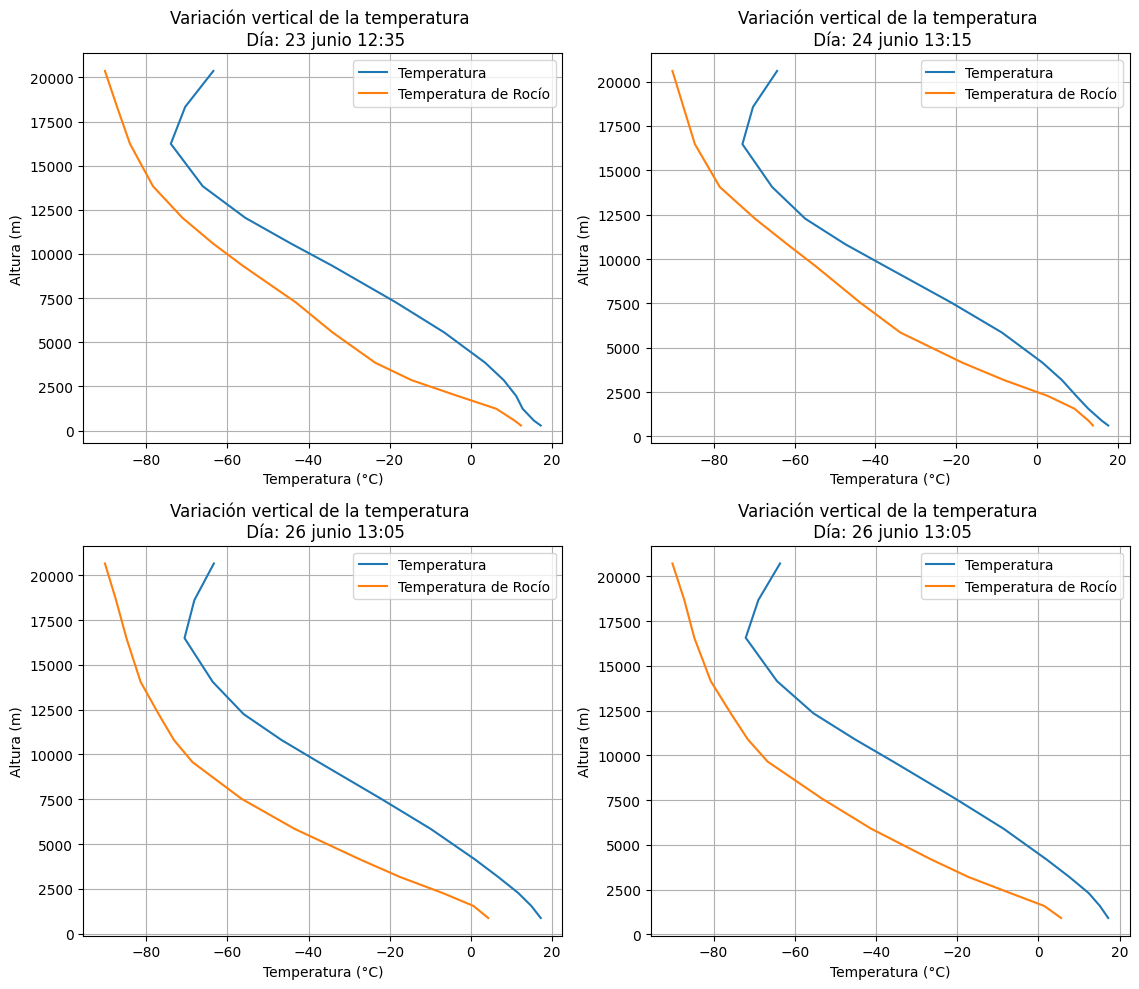

In [196]:
fig, axs = plt.subplots(2, 2, figsize=(11.5, 10))
##dia 23
ax1 = axs[0, 0]
temperatura_23 = df_23_junio_cleaned['T (ºC)']
temperatura_rocio_23 = df_23_junio_cleaned['Td (ºC)']
altura_23 = df_23_junio_cleaned['Altura (m)']
ax1.plot(temperatura_23, altura_23, label='Temperatura')
ax1.plot(temperatura_rocio_23, altura_23, label='Temperatura de Rocío')
ax1.set_xlabel('Temperatura (°C)')
ax1.set_ylabel('Altura (m)')
ax1.legend()
ax1.grid()
ax1.set_title("Variación vertical de la temperatura \n Día: 23 junio 12:35")
## dia 24
ax2 = axs[0, 1]
temperatura_24 = df_24_junio_cleaned['T (ºC)']
temperatura_rocio_24 = df_24_junio_cleaned['Td (ºC)']
altura_24 = df_24_junio_cleaned['Altura (m)']
ax2.plot(temperatura_24, altura_24, label='Temperatura')
ax2.plot(temperatura_rocio_24, altura_24, label='Temperatura de Rocío')
ax2.set_xlabel('Temperatura (°C)')
ax2.set_ylabel('Altura (m)')
ax2.legend()
ax2.grid()
ax2.set_title("Variación vertical de la temperatura \n Día: 24 junio 13:15")
## dia 26
ax3 = axs[1, 0]
temperatura_26 = df_26_junio_cleaned['T (ºC)']
temperatura_rocio_26 = df_26_junio_cleaned['Td (ºC)']
altura_26 = df_26_junio_cleaned['Altura (m)']
ax3.plot(temperatura_26, altura_26, label='Temperatura')
ax3.plot(temperatura_rocio_26, altura_26, label='Temperatura de Rocío')
ax3.set_xlabel('Temperatura (°C)')
ax3.set_ylabel('Altura (m)')
ax3.legend()
ax3.grid()
ax3.set_title("Variación vertical de la temperatura \n Día: 26 junio 13:05")
# dia 28
ax4 = axs[1, 1]
temperatura_28 = df_28_junio_cleaned['T (ºC)']
temperatura_rocio_28 = df_28_junio_cleaned['Td (ºC)']
altura_28 = df_28_junio_cleaned['Altura (m)']
ax4.plot(temperatura_28, altura_28, label='Temperatura')
ax4.plot(temperatura_rocio_28, altura_28, label='Temperatura de Rocío')
ax4.set_xlabel('Temperatura (°C)')
ax4.set_ylabel('Altura (m)')
ax4.legend()
ax4.grid()
ax4.set_title("Variación vertical de la temperatura \n Día: 28 junio 12:45")

plt.tight_layout()

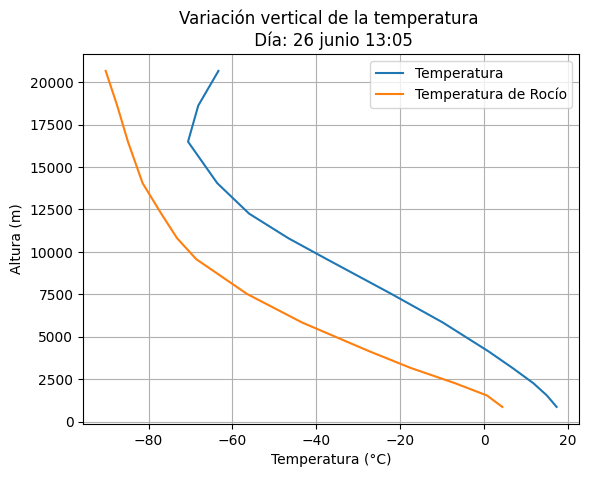

In [192]:
temperatura_26 = df_26_junio_cleaned['T (ºC)']
temperatura_rocio_26 = df_26_junio_cleaned['Td (ºC)']
altura_26 = df_26_junio_cleaned['Altura (m)']

# Graficar la variación vertical de la temperatura
plt.plot(temperatura_26, altura_26, label='Temperatura')
plt.plot(temperatura_rocio_26, altura_26, label='Temperatura de Rocío')

plt.xlabel('Temperatura (°C)')
plt.ylabel('Altura (m)')
plt.legend()
plt.grid()
plt.title("Variación vertical de la temperatura \n Día: 26 junio 13:05")
plt.show()

# Exportar

In [197]:
df_23_junio.to_csv("Exportar/MODIS23_junio.csv")
df_24_junio.to_csv("Exportar/MODIS24_junio.csv")
df_26_junio.to_csv("Exportar/MODIS26_junio.csv")
df_28_junio.to_csv("Exportar/MODIS28_junio.csv")